In [1]:
from chromatic import *

To make it user friendly, we could include a download script that would grab a particular group of files directly from the public LCO archive.

In [6]:
home = '/Users/willwaalkes/Desktop/PhD_Thesis/AUMic_starspots'

Here is how we read in all the spectra of a specific order from the NRES instrument at LCOGT.

LCO NRES spectra span orders XX-XX. Order 71 is the order which contains H$\alpha$ emission, so let's take a look at that one.

In [7]:
r = Rainbow(home+'/data/NRES/Spring_2022_Spectra/*e92-1d.fits.fz', format='nres', order=71)

48it [00:15,  3.12it/s]

🌈 Warning: divide by zero encountered in log
🌈 Warning: invalid value encountered in subtract

Let's take a look at the spectra as they were read in, without applying any corrections.

<AxesSubplot:xlabel='Time ($\\mathrm{d}$)', ylabel='Wavelength Index'>

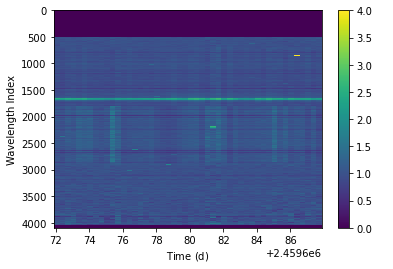

In [13]:
r.imshow(vmax=4)

To ensure we are comparing spectra on the same grid of wavelengths, let's use r.align_wavelengths() to apply a correction. Aligning the wavelengths will also properly identify and label the wavelength arrays.

In [14]:
a = r.align_wavelengths()

<AxesSubplot:xlabel='Time ($\\mathrm{d}$)', ylabel='Wavelength ($\\mathrm{\\mu m}$)'>

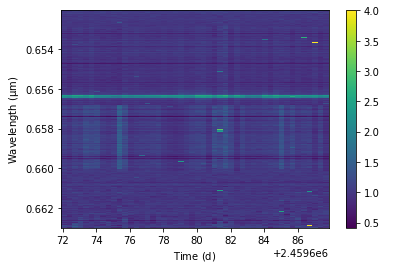

In [15]:
a.imshow(vmax=4)

Let's pull out the wavelength, flux, error, and data mask from the rainbow so we can interact with individual spectra.

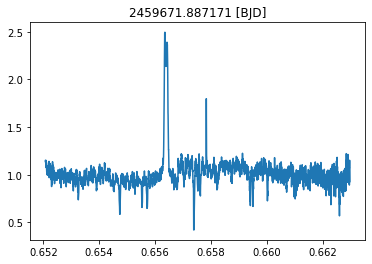

In [30]:
w = a.wavelength
f = a.fluxlike['flux'][:,0] #the 0th time point, with date extracted below
e = a.fluxlike['uncertainty'][:,0]
date = a.timelike['time'][0]

plt.plot(w,f)
plt.title(f'{date.value} [BJD]')
plt.show()

Looks great! Now how do we extract a time-averaged spectrum?

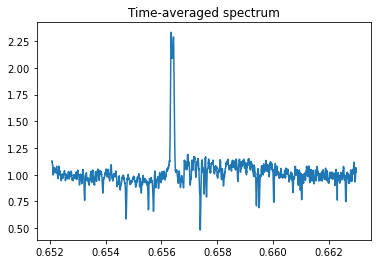

In [31]:
w = a.wavelength
f = a.fluxlike['flux'] #the 0th time point, with date extracted below
f_avg = np.median(f,axis=1)

plt.plot(w,f_avg)
plt.title('Time-averaged spectrum')
plt.show()

Let's fit a model to our time-averaged spectrum!